# NOTE: If you are planning to use YAGMAIL for email alerts, please makes sure the relevant package has been installed/tested

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

if os.getcwd()[-7:] == 'AAM_Sim':
    print(os.getcwd())
else:
    path_parent = os.path.dirname(os.getcwd())
    os.chdir(path_parent)
    path_parent = os.path.dirname(os.getcwd())
    os.chdir(path_parent)
    print(os.getcwd())

from CrossPlatformDev import my_print, join_str

import time
import psutil

from MonteCarlo.TwoAircraftEncounter.ScenarioMP import simulate_encounter

C:\Users\quekz\PycharmProjects\AAM_Sim


### Turn off warnings in Linux (AWS)... tqdm seems to have issues displaying correctly if there are many warnings. 

In [2]:
import warnings
import platform
if platform.system() == 'Linux':
    warnings.filterwarnings('ignore') # <---- hides warnings, makes tqdm work better.

In [3]:
from tqdm.notebook import tqdm
import multiprocessing as mp

Init_Param_Path = join_str(os.getcwd(), 'MonteCarlo', 'TwoAircraftEncounter', 'Init_Param.csv')

data = pd.read_csv(Init_Param_Path)

data = data['Run'].unique()
# data = data[0:3]

if __name__ == '__main__':
    start = time.time()
    # with mp.Pool(processes = psutil.cpu_count(logical=True)) as pool:
    with mp.Pool(processes = 3) as pool:
        results = list(tqdm(pool.imap(simulate_encounter, data), total = len(data)))
        pool.close()
        pool.join()
        results = pd.concat(results)
        #joined_df = df.set_index('Flight no.').join(results.set_index('Flight no.'), on = 'Flight no.')
        end = time.time()
        
compute_time = end-start
simulated_flight_time_s = results['Total_Flight_Time'].sum()
speedup = simulated_flight_time_s/compute_time
print('Took %.3f seconds, simulated flight time is %.3f seconds, total speedup is %.3f times'%(end-start, 
                                                                                               simulated_flight_time_s, 
                                                                                               speedup))

results

  0%|          | 0/3 [00:00<?, ?it/s]

Took 59.104 seconds, simulated flight time is 449.192 seconds, total speedup is 7.600 times


,Run,AC1_NSE_Radial_Error_Mean,AC1_NSE_Radial_Error_Std,AC1_NSE_Mean_x,AC1_NSE_Mean_y,AC1_NSE_Mean_z,AC1_NSE_Std_x,AC1_NSE_Std_y,AC1_NSE_Std_z,AC2_NSE_Radial_Error_Mean,...,WC1i_Rel_Hor_Dist,WC1i_Rel_Vert_Dist,WC1j_Start_Time,WC1j_End_Time,WC1j_Detected,WC1j_Rel_Hdg_(Actual_Rad),WC1j_Rel_Hdg_(Desired_Track_Rad),WC1j_Rel_Vel_Hdg_(Actual_Rad),WC1j_Rel_Hor_Dist,WC1j_Rel_Vert_Dist
0,0,4.615267,2.332127,-1.867186,-3.017261,0.993628,1.715641,3.347467,1.073478,3.413986,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
0,1,4.379426,1.655950,2.395116,-1.677398,0.483768,2.013802,3.052171,0.770733,3.817981,...,44.985443,-2.000372,35.970833,47.166667,1,1.927522,1.959555,0.536500,49.975053,-1.783872
0,2,5.921767,3.431842,2.704630,-2.283593,1.041713,3.563144,4.649555,1.022194,4.524243,...,NaN,NaN,61.104167,64.345833,1,2.023196,2.147187,0.039923,49.998612,3.282678


In [4]:
results.columns

Index(['Run', 'AC1_NSE_Radial_Error_Mean', 'AC1_NSE_Radial_Error_Std',
       'AC1_NSE_Mean_x', 'AC1_NSE_Mean_y', 'AC1_NSE_Mean_z', 'AC1_NSE_Std_x',
       'AC1_NSE_Std_y', 'AC1_NSE_Std_z', 'AC2_NSE_Radial_Error_Mean',
       ...
       'WC1i_Rel_Hor_Dist', 'WC1i_Rel_Vert_Dist', 'WC1j_Start_Time',
       'WC1j_End_Time', 'WC1j_Detected', 'WC1j_Rel_Hdg_(Actual_Rad)',
       'WC1j_Rel_Hdg_(Desired_Track_Rad)', 'WC1j_Rel_Vel_Hdg_(Actual_Rad)',
       'WC1j_Rel_Hor_Dist', 'WC1j_Rel_Vert_Dist'],
      dtype='object', length=134)

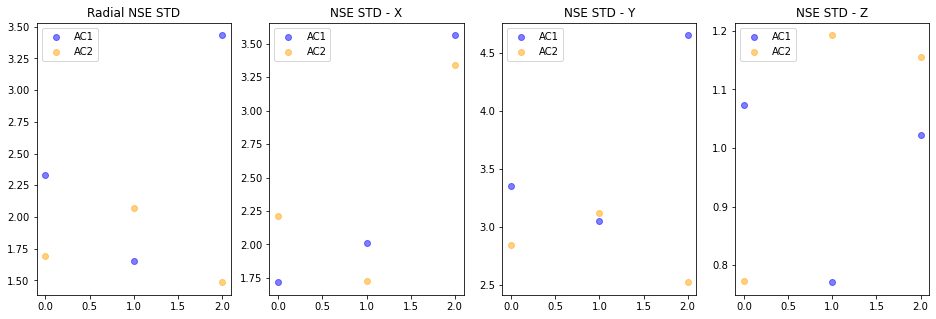

In [5]:
fig, axs = plt.subplots(ncols=4, figsize=(16,5))

axs[0].scatter(results['Run'], results['AC1_NSE_Radial_Error_Std'], label='AC1', color='b', alpha=0.5)
axs[0].scatter(results['Run'], results['AC2_NSE_Radial_Error_Std'], label='AC2', color='orange', alpha=0.5)
axs[0].set_title('Radial NSE STD')
axs[0].legend()

axs[1].scatter(results['Run'], results['AC1_NSE_Std_x'], label='AC1', color='b', alpha=0.5)
axs[1].scatter(results['Run'], results['AC2_NSE_Std_x'], label='AC2', color='orange', alpha=0.5)
axs[1].set_title('NSE STD - X')
axs[1].legend()

axs[2].scatter(results['Run'], results['AC1_NSE_Std_y'], label='AC1', color='b', alpha=0.5)
axs[2].scatter(results['Run'], results['AC2_NSE_Std_y'], label='AC2', color='orange', alpha=0.5)
axs[2].set_title('NSE STD - Y')
axs[2].legend()

axs[3].scatter(results['Run'], results['AC1_NSE_Std_z'], label='AC1', color='b', alpha=0.5)
axs[3].scatter(results['Run'], results['AC2_NSE_Std_z'], label='AC2', color='orange', alpha=0.5)
axs[3].set_title('NSE STD - Z')
axs[3].legend()

plt.show()

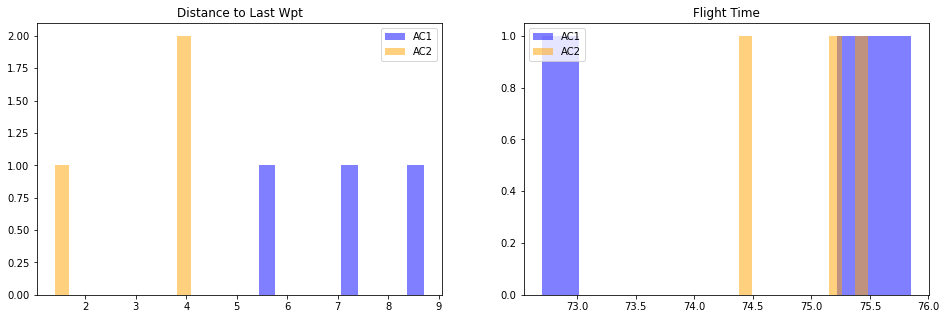

In [6]:
fig, axs = plt.subplots(ncols=2, figsize=(16,5))

axs[0].hist(results['AC1_Dist_to_Last_WPT'], color='b', alpha=0.5, label = 'AC1')
axs[0].hist(results['AC2_Dist_to_Last_WPT'], color='orange', alpha=0.5, label = 'AC2')
axs[0].set_title('Distance to Last Wpt')
axs[0].legend()

axs[1].hist(results['AC1_EndState_Time'], color='b', alpha=0.5, label = 'AC1')
axs[1].hist(results['AC2_EndState_Time'], color='orange', alpha=0.5, label = 'AC2')
axs[1].set_title('Flight Time')
axs[1].legend()

plt.show()

In [7]:
Results_Path = join_str(os.getcwd(), 'MonteCarlo', 'TwoAircraftEncounter', 'Results.csv')

results.to_csv(Results_Path)

In [8]:
import smtplib, ssl

email_address = 'tmuas2022@gmail.com'     # add email address here
Subject = 'Subject: Monte Carlo Results \n\n'
content = ' Dear Sith Lord, \n Your Simulation results beckon.\n\n ' 
footer = 'Your Droid Army (AWS)'    # add test footer 
passcode = 'zupmvqlgtwkjyjxl'        # add passcode here
conn = smtplib.SMTP_SSL('smtp.gmail.com', 465) 
conn.ehlo()
conn.login(email_address, passcode)
conn.sendmail(email_address,
              'zhihao.quek16@sps.nus.edu.sg',
              Subject + content + footer)
conn.quit()